In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df_temp =  pd.read_csv("xhd_fq_4_9.txt",sep=' ',names=['X_a','Y_a','Z_a','X_ω','Y_ω','Z_ω'])
a1 = df_temp[df_temp['Z_ω']== 1000].index.tolist() #判断Z_ω=1000的次数，a1/2为动作次数
print('xhd_fq_4_9文件 动作次数是：',len(a1)/2) 

xhd_fq_4_9文件 动作次数是： 115.0


In [2]:
a1
    

[0,
 90,
 91,
 176,
 177,
 268,
 269,
 351,
 352,
 440,
 441,
 529,
 530,
 611,
 612,
 702,
 703,
 797,
 798,
 878,
 879,
 964,
 965,
 1052,
 1053,
 1151,
 1152,
 1240,
 1241,
 1331,
 1332,
 1426,
 1427,
 1517,
 1518,
 1606,
 1607,
 1731,
 1732,
 1814,
 1815,
 1901,
 1902,
 1996,
 1997,
 2080,
 2081,
 2207,
 2208,
 2289,
 2290,
 2373,
 2374,
 2457,
 2458,
 2547,
 2548,
 2642,
 2643,
 2746,
 2747,
 2847,
 2848,
 2946,
 2947,
 3039,
 3040,
 3136,
 3137,
 3224,
 3225,
 3311,
 3312,
 3410,
 3411,
 3544,
 3545,
 3658,
 3659,
 3760,
 3761,
 3857,
 3858,
 3952,
 3953,
 4034,
 4035,
 4132,
 4133,
 4240,
 4241,
 4344,
 4345,
 4450,
 4451,
 4555,
 4556,
 4672,
 4673,
 4761,
 4762,
 4860,
 4861,
 4966,
 4967,
 5064,
 5065,
 5326,
 5327,
 5417,
 5418,
 5527,
 5528,
 5628,
 5629,
 5736,
 5737,
 5848,
 5849,
 5955,
 5956,
 6055,
 6056,
 6170,
 6171,
 6263,
 6264,
 6358,
 6359,
 6465,
 6466,
 6562,
 6563,
 6673,
 6674,
 6811,
 6812,
 6920,
 6921,
 7029,
 7030,
 7126,
 7127,
 7225,
 7226,
 7326,
 7327

In [3]:
sub_df = {}
df = {}
for i in range(0,int(len(a1)/2)):
    sub_df[i] = df_temp.iloc[a1[i*2]+1:a1[(i*2)+1]] #切割：将每次动作切割出来
    print(i,sub_df[i])
    sub_df[i] = sub_df[i].rolling(window = 5).mean()
    sub_df[i] = sub_df[i].reset_index(drop=True) #重新定义行索引从0开始
    df_max = sub_df[i]['Z_ω'].idxmax() #找到Z_ω最大值点对应的行索引
    df[i] = sub_df[i].loc[df_max-24:df_max+25].reset_index(drop=True).fillna(0)
    #根据Z_ω行索引 提取动作段，前25个数据，后25个数据

0          X_a       Y_a       Z_a       X_ω       Y_ω       Z_ω
1   1.020508 -0.257812 -0.042480  1.707317  1.829268  8.048780
2   1.009766 -0.270996 -0.042480 -0.304878  1.829268  8.536586
3   1.014160 -0.275391 -0.048340 -0.243902  1.951220  9.024390
4   1.007324 -0.292969 -0.061523  0.670732  2.317073  8.475610
5   1.020508 -0.280762 -0.045898  0.609756  2.378049  7.134147
..       ...       ...       ...       ...       ...       ...
85  1.014648 -0.194824 -0.100586  0.000000 -0.914634 -5.975610
86  1.010254 -0.151855 -0.082520  1.829268 -0.609756 -7.621952
87  1.016113 -0.164551 -0.071289  1.219512  0.487805 -5.487805
88  1.018555 -0.189453 -0.081543  0.426829  0.670732 -2.195122
89  1.018555 -0.172363 -0.084473  1.890244  0.060976 -0.426829

[89 rows x 6 columns]
1           X_a       Y_a       Z_a        X_ω       Y_ω       Z_ω
92   1.009766 -0.228516 -0.079102   1.280488  2.439024  7.012195
93   1.017578 -0.223633 -0.067383   3.475610  3.109756  7.012195
94   1.008789 -0.24658

27            X_a       Y_a       Z_a        X_ω        Y_ω        Z_ω
2459  1.009277 -0.318848 -0.041504   0.975610   4.695122   7.012195
2460  1.002441 -0.305176 -0.037109   1.524390   4.390244   5.548780
2461  1.001465 -0.319824 -0.035645   0.000000   4.146341   5.121951
2462  1.000488 -0.323730 -0.042480  -1.280488   4.451220   5.365854
2463  1.007812 -0.332520 -0.040527  -2.134146   4.329268   5.060976
...        ...       ...       ...        ...        ...        ...
2542  1.717285 -0.354492  0.238770 -24.451220 -28.902440  98.414635
2543  1.271973 -0.879395  0.166504 -12.743903 -19.939024  59.024390
2544  1.281738 -0.307617 -0.089355  22.012196 -17.682928  43.902440
2545  1.086426 -0.349121 -0.228027  38.475610 -15.670733  36.585365
2546  1.085449 -0.372070 -0.172363  15.670733 -14.939025  28.170732

[88 rows x 6 columns]
28            X_a       Y_a       Z_a        X_ω        Y_ω       Z_ω
2549  1.015137 -0.299316 -0.066895  -2.134146   0.304878  2.500000
2550  1.011230 -0.300

51            X_a       Y_a       Z_a        X_ω        Y_ω        Z_ω
4862  1.021973 -0.233398 -0.024902   0.426829   3.719512   2.621951
4863  1.029785 -0.237793 -0.020020  -2.621951   4.573171   2.865854
4864  1.016602 -0.259766 -0.024414  -5.426829   4.878049   3.658537
4865  1.018555 -0.258789 -0.019531  -4.451220   5.000000   4.268293
4866  1.021484 -0.261719 -0.024414  -5.000000   5.121951   3.597561
...        ...       ...       ...        ...        ...        ...
4961  1.023926 -0.347168  0.016113   5.243903 -13.597561   0.975610
4962  1.052246 -0.349121 -0.052246  16.341463 -15.792684  -5.060976
4963  1.029785 -0.335449 -0.014648   3.414634 -14.390245  -8.841464
4964  0.991699 -0.352539 -0.034180 -19.390244 -10.304878 -12.134147
4965  0.998047 -0.333984 -0.015137 -21.707317  -8.597561 -14.817074

[104 rows x 6 columns]
52            X_a       Y_a       Z_a        X_ω        Y_ω        Z_ω
4968  1.012695 -0.300293 -0.067383   7.256098  -4.390244   4.756098
4969  1.012207 -0.

78            X_a       Y_a       Z_a       X_ω       Y_ω       Z_ω
7852  1.011719 -0.320312 -0.029785  0.000000 -0.365854  1.341463
7853  1.012695 -0.309570 -0.020996  0.426829 -0.548781 -0.182927
7854  1.014160 -0.298828 -0.025879  1.768293 -0.670732 -0.243902
7855  1.006348 -0.307617 -0.035645  1.341463 -0.426829  0.670732
7856  1.006836 -0.316406 -0.030762  0.060976  0.060976  1.158537
...        ...       ...       ...       ...       ...       ...
7958  1.019043 -0.271973 -0.027344 -3.353659 -2.073171 -3.902439
7959  1.019043 -0.254883 -0.050781  3.414634 -2.743902 -4.268293
7960  1.017090 -0.235352 -0.041016  7.500000 -2.195122 -4.146341
7961  1.016113 -0.270508 -0.041992  6.646342 -1.280488 -3.109756
7962  1.041992 -0.264648 -0.029297  4.695122 -1.219512 -1.341463

[111 rows x 6 columns]
79            X_a       Y_a       Z_a       X_ω       Y_ω        Z_ω
7965  1.006836 -0.320801 -0.041504  3.231707  1.646341   6.646342
7966  1.005371 -0.317383 -0.033203  1.219512  1.280488   5

[108 rows x 6 columns]
112             X_a       Y_a       Z_a         X_ω        Y_ω        Z_ω
11314  1.038574 -0.234863  0.006836    2.500000  -4.085366  -3.536585
11315  1.021973 -0.233398  0.006348    1.524390  -4.817073  -2.682927
11316  1.020508 -0.245605 -0.006348    0.670732  -5.304878  -1.951220
11317  1.026855 -0.244629 -0.019043    0.853659  -5.182927  -1.463415
11318  1.025391 -0.236816 -0.012695    1.219512  -4.756098  -0.670732
...         ...       ...       ...         ...        ...        ...
11404  1.313477 -1.249023  0.216309 -107.621956  -3.231707  12.195122
11405  1.287109 -0.966309  0.061523  -32.317074  -5.609756  33.048782
11406  1.447266 -0.386230  0.180664   14.451220 -13.048780  57.439026
11407  1.276855 -0.194336  0.049805   69.939026  -9.512196  55.426830
11408  1.137207 -0.209961 -0.013672   91.585365  -5.060976  42.073174

[95 rows x 6 columns]
113             X_a       Y_a       Z_a        X_ω        Y_ω        Z_ω
11411  1.021973 -0.219238  0.018066 -

In [4]:
for i in df:
    print(i,len(df[i]))

0 50
1 50
2 50
3 50
4 50
5 50
6 50
7 50
8 50
9 50
10 50
11 50
12 50
13 50
14 50
15 50
16 50
17 49
18 50
19 50
20 50
21 50
22 50
23 50
24 50
25 50
26 50
27 50
28 50
29 50
30 50
31 50
32 50
33 50
34 50
35 50
36 50
37 49
38 50
39 50
40 50
41 50
42 50
43 50
44 50
45 50
46 50
47 50
48 50
49 50
50 50
51 50
52 50
53 50
54 50
55 50
56 50
57 50
58 50
59 50
60 50
61 50
62 50
63 50
64 50
65 50
66 50
67 50
68 50
69 50
70 50
71 50
72 50
73 50
74 50
75 50
76 50
77 50
78 50
79 50
80 50
81 50
82 50
83 50
84 50
85 50
86 50
87 50
88 50
89 50
90 50
91 50
92 50
93 50
94 50
95 50
96 50
97 50
98 50
99 50
100 50
101 50
102 50
103 50
104 50
105 50
106 50
107 50
108 50
109 50
110 50
111 50
112 50
113 50
114 50


In [5]:
df[26]

,X_a,Y_a,Z_a,X_ω,Y_ω,Z_ω
0,1.004004,-0.336133,-0.032422,-2.695122,3.743902,8.573171
1,1.005859,-0.344336,-0.034473,-3.597561,3.890244,9.987805
2,1.004980,-0.364551,-0.032715,-4.048781,3.926829,10.475610
3,1.013379,-0.391211,-0.039062,-2.182927,3.829268,9.073171
4,1.026270,-0.396973,-0.040527,5.097561,3.780488,4.402439
5,1.077539,-0.390918,-0.046094,13.170732,4.878049,-6.073171
6,1.216602,-0.382324,-0.075000,15.890245,7.378049,-25.158537
7,1.516504,-0.244727,-0.164844,15.243903,10.597562,-53.634148
8,1.933203,-0.054297,-0.237109,15.317074,13.926830,-92.621954
9,2.410840,0.010449,-0.271875,11.121952,17.939025,-143.439025


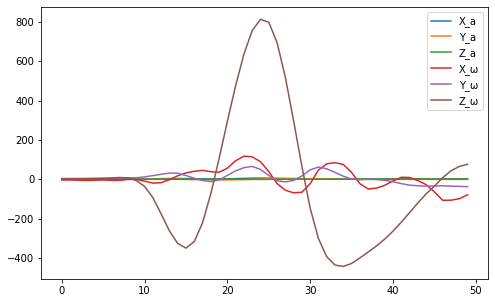

<Figure size 432x288 with 0 Axes>

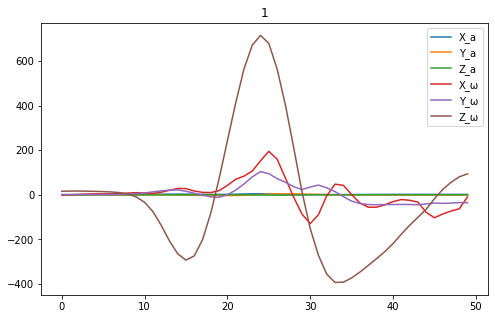

<Figure size 432x288 with 0 Axes>

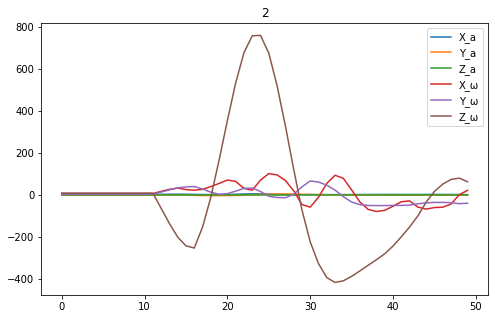

<Figure size 432x288 with 0 Axes>

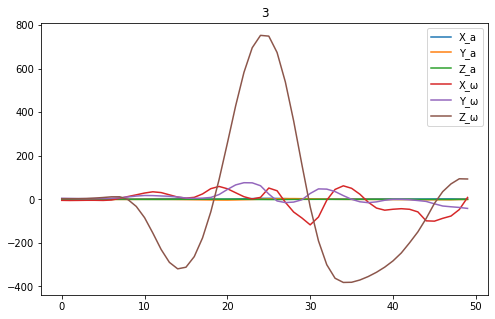

<Figure size 432x288 with 0 Axes>

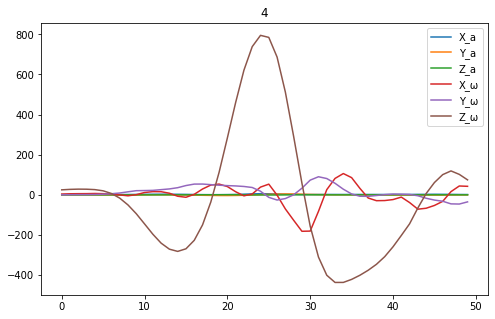

<Figure size 432x288 with 0 Axes>

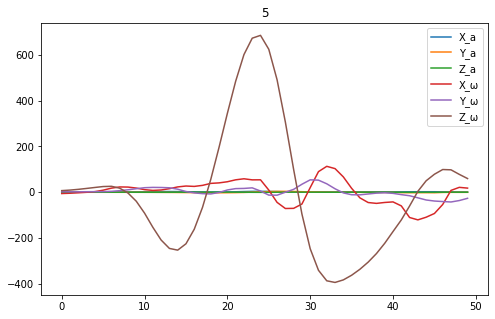

<Figure size 432x288 with 0 Axes>

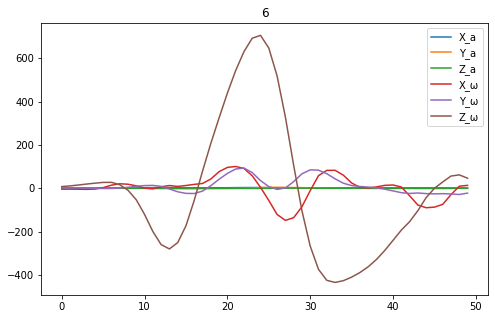

<Figure size 432x288 with 0 Axes>

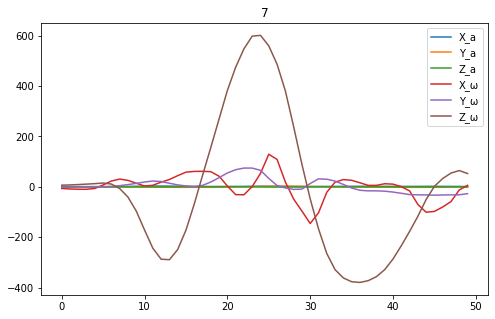

<Figure size 432x288 with 0 Axes>

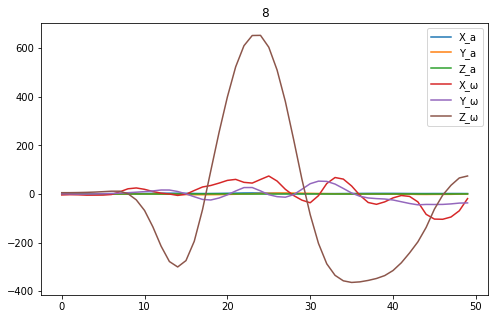

<Figure size 432x288 with 0 Axes>

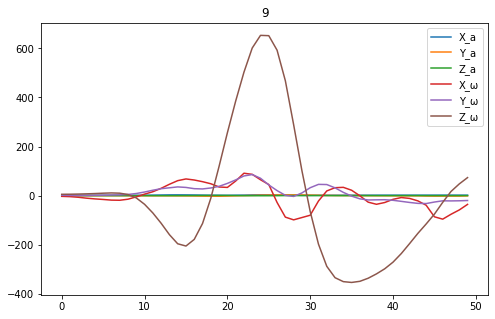

<Figure size 432x288 with 0 Axes>

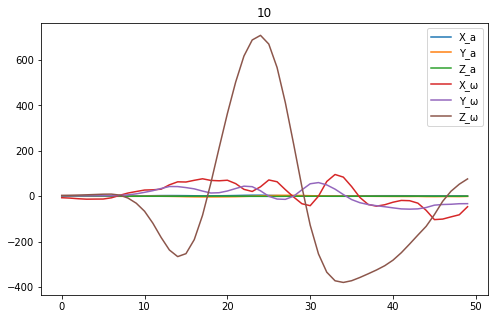

<Figure size 432x288 with 0 Axes>

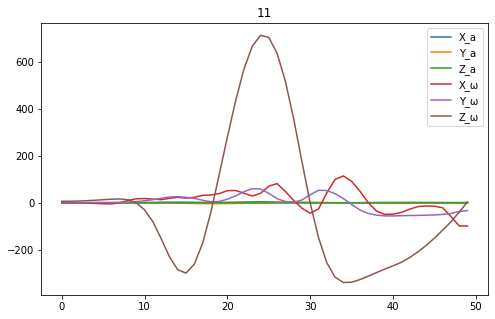

<Figure size 432x288 with 0 Axes>

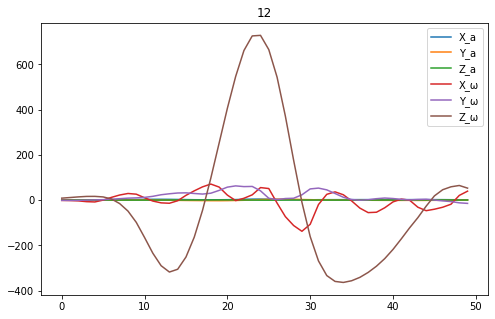

<Figure size 432x288 with 0 Axes>

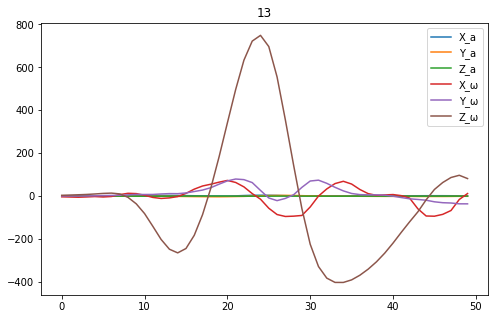

<Figure size 432x288 with 0 Axes>

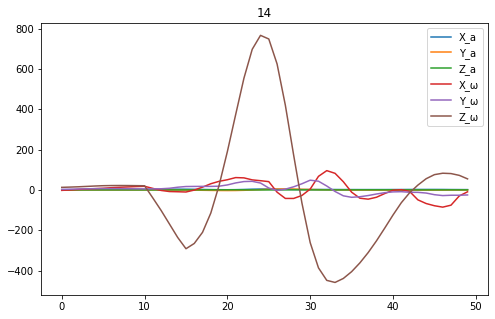

<Figure size 432x288 with 0 Axes>

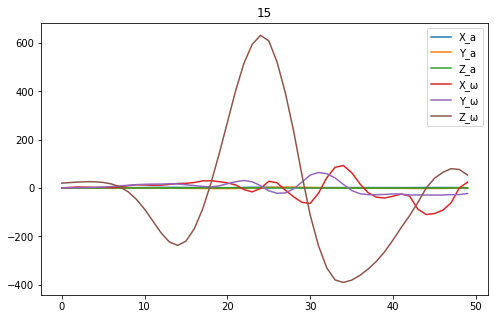

<Figure size 432x288 with 0 Axes>

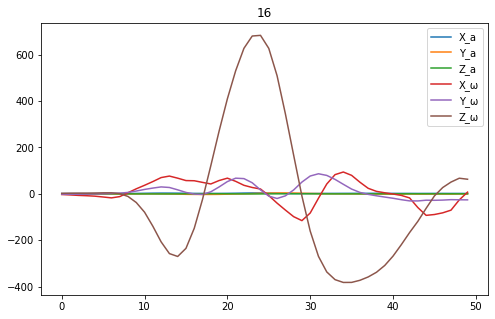

<Figure size 432x288 with 0 Axes>

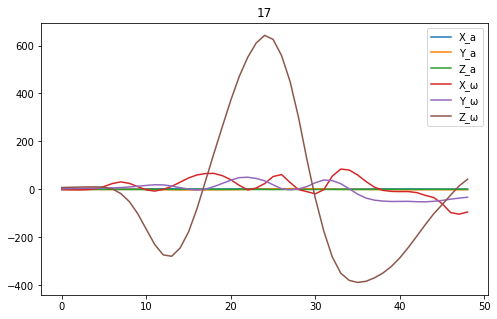

<Figure size 432x288 with 0 Axes>

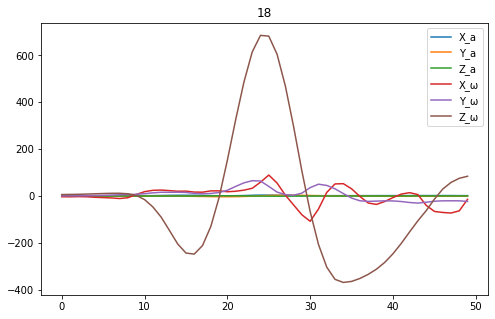

<Figure size 432x288 with 0 Axes>

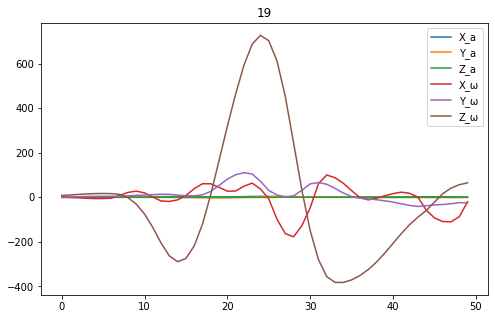

<Figure size 432x288 with 0 Axes>

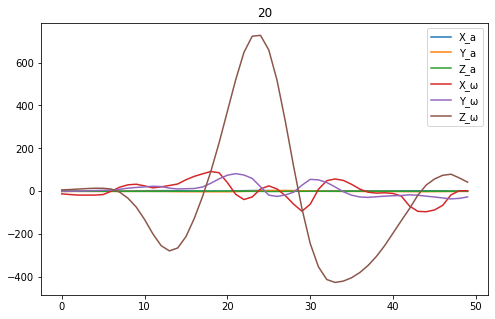

<Figure size 432x288 with 0 Axes>

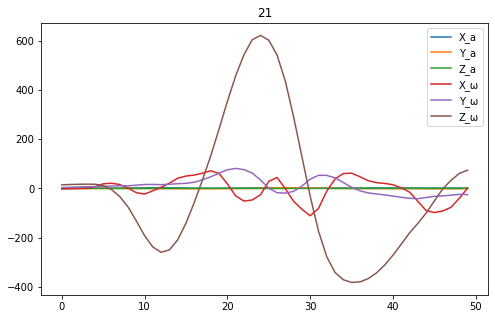

<Figure size 432x288 with 0 Axes>

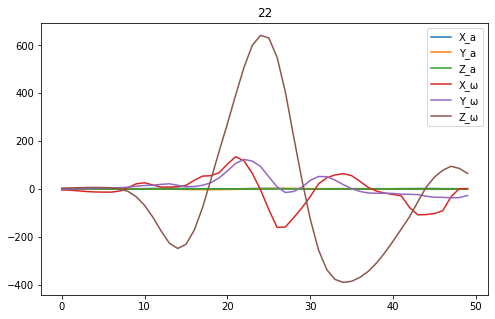

<Figure size 432x288 with 0 Axes>

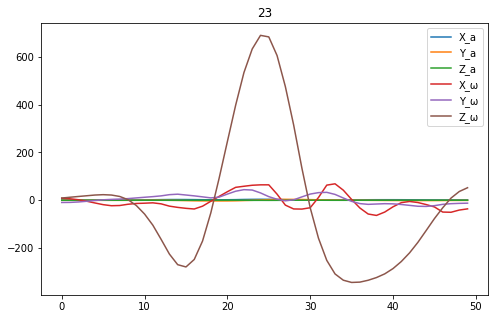

<Figure size 432x288 with 0 Axes>

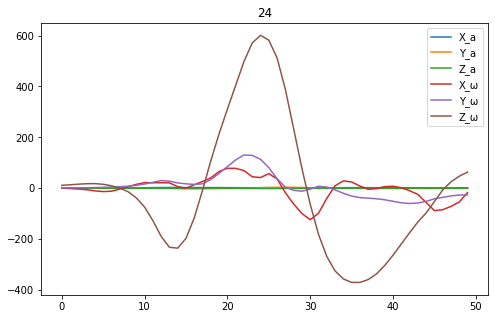

<Figure size 432x288 with 0 Axes>

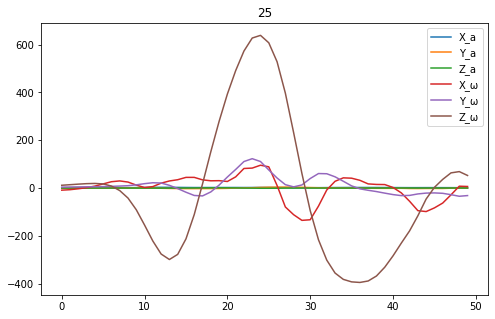

<Figure size 432x288 with 0 Axes>

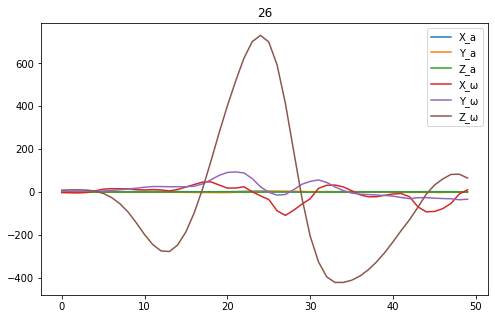

<Figure size 432x288 with 0 Axes>

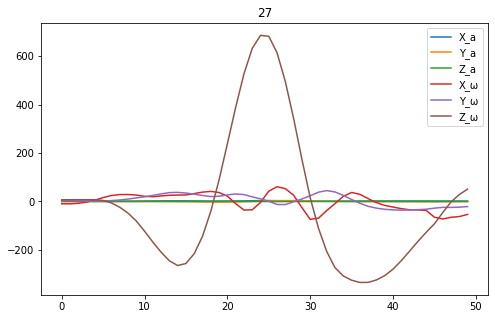

<Figure size 432x288 with 0 Axes>

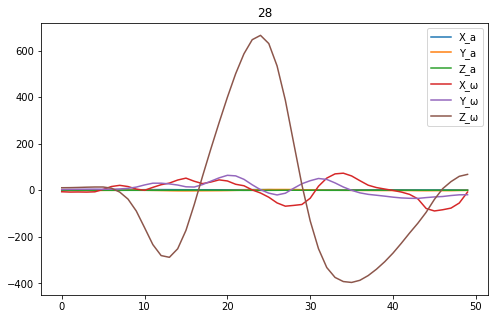

<Figure size 432x288 with 0 Axes>

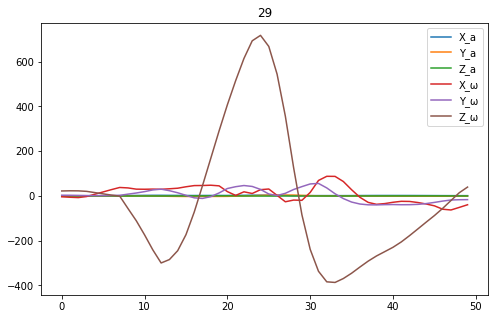

<Figure size 432x288 with 0 Axes>

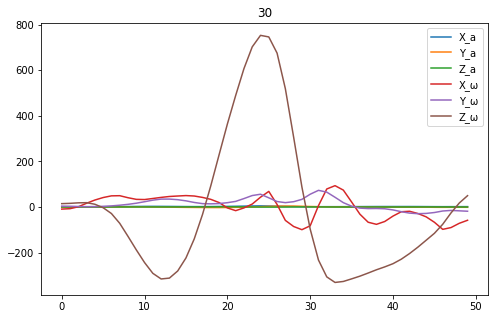

<Figure size 432x288 with 0 Axes>

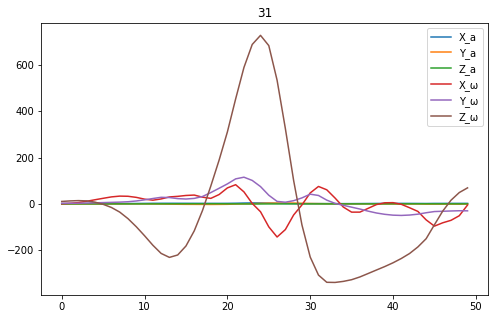

<Figure size 432x288 with 0 Axes>

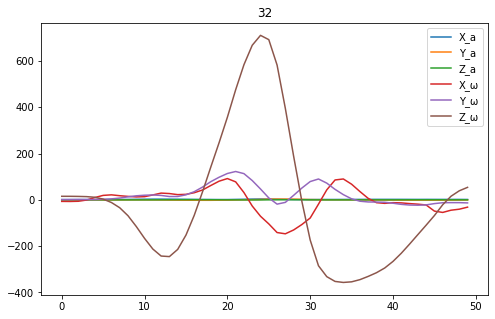

<Figure size 432x288 with 0 Axes>

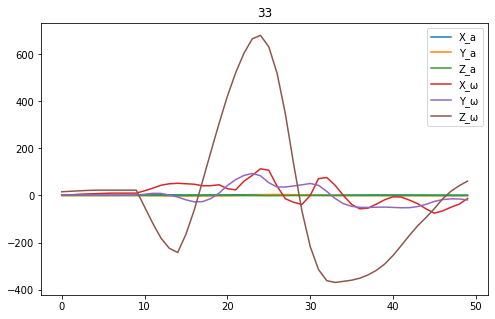

<Figure size 432x288 with 0 Axes>

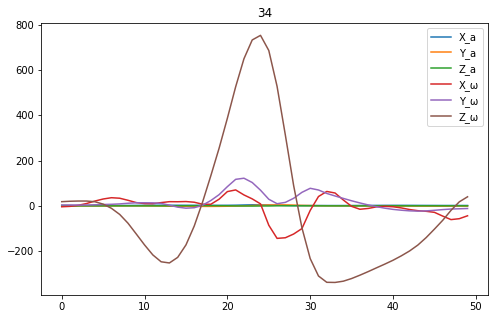

<Figure size 432x288 with 0 Axes>

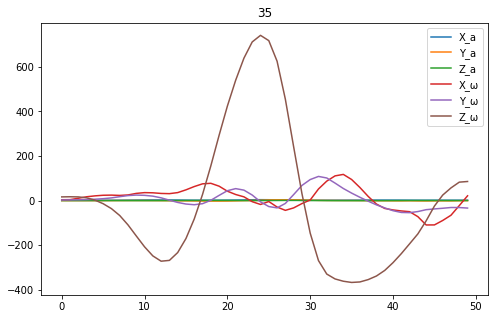

<Figure size 432x288 with 0 Axes>

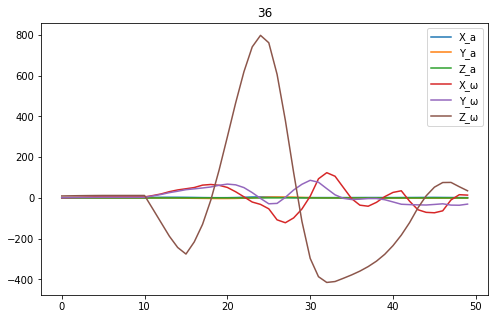

<Figure size 432x288 with 0 Axes>

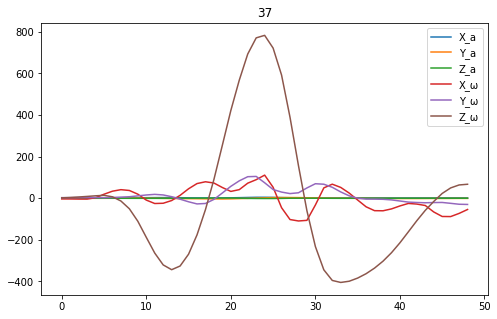

<Figure size 432x288 with 0 Axes>

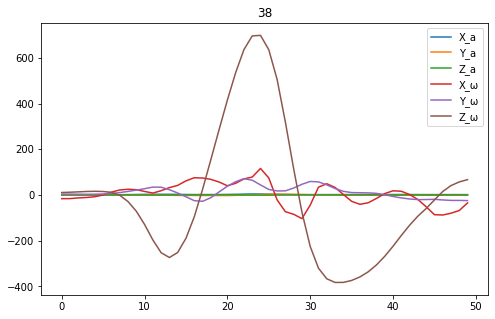

<Figure size 432x288 with 0 Axes>

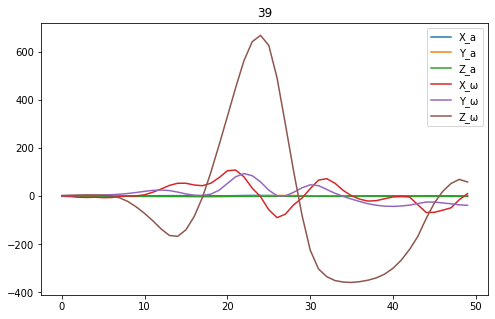

<Figure size 432x288 with 0 Axes>

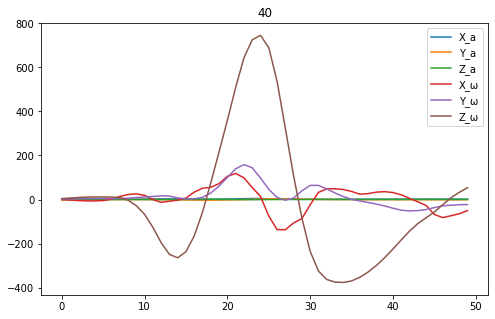

<Figure size 432x288 with 0 Axes>

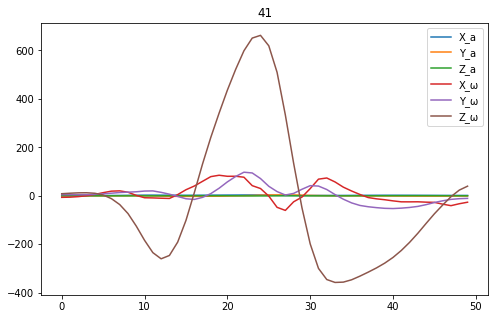

<Figure size 432x288 with 0 Axes>

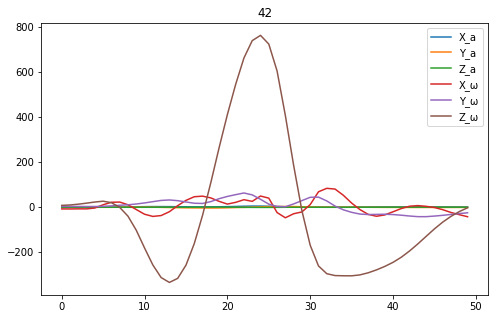

<Figure size 432x288 with 0 Axes>

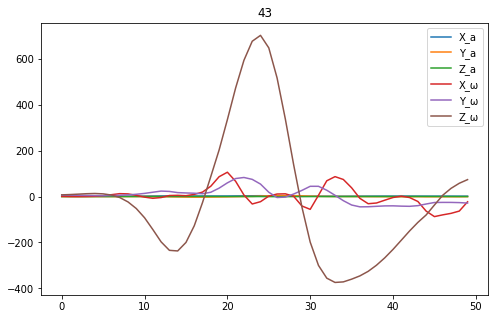

<Figure size 432x288 with 0 Axes>

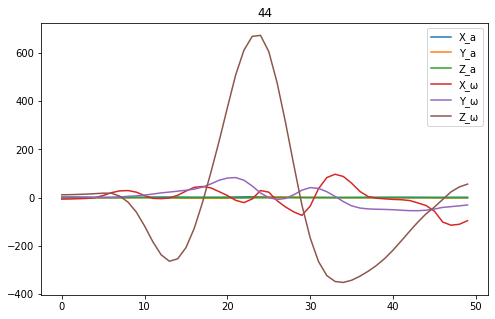

<Figure size 432x288 with 0 Axes>

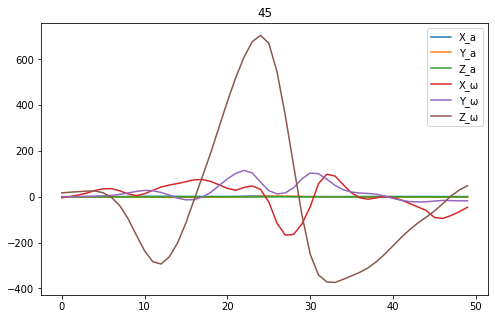

<Figure size 432x288 with 0 Axes>

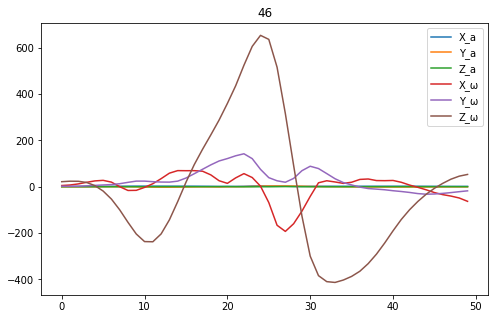

<Figure size 432x288 with 0 Axes>

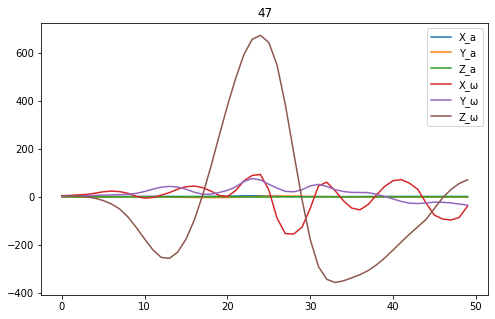

<Figure size 432x288 with 0 Axes>

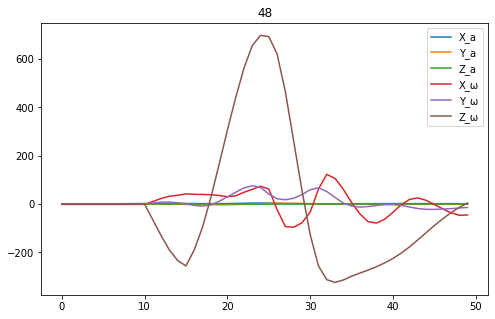

<Figure size 432x288 with 0 Axes>

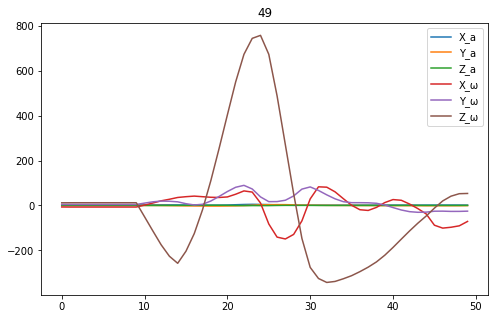

<Figure size 432x288 with 0 Axes>

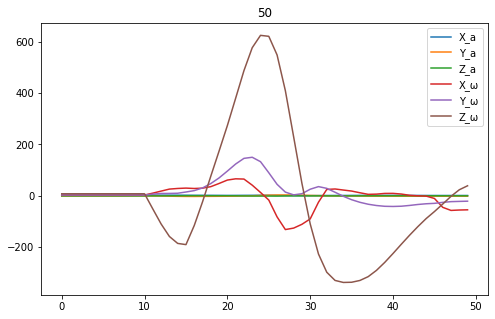

<Figure size 432x288 with 0 Axes>

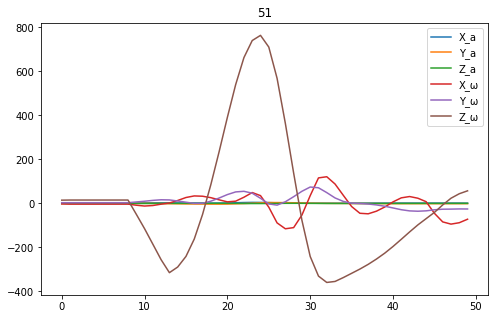

<Figure size 432x288 with 0 Axes>

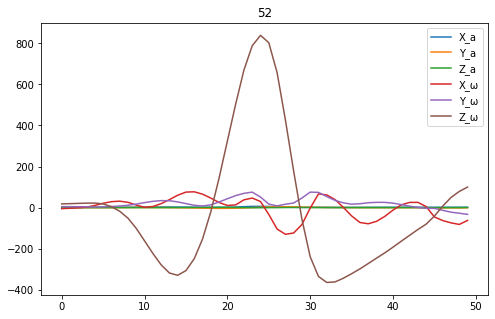

<Figure size 432x288 with 0 Axes>

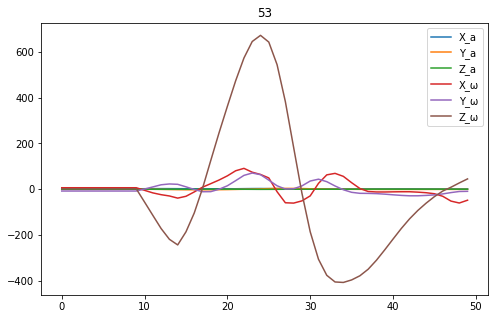

<Figure size 432x288 with 0 Axes>

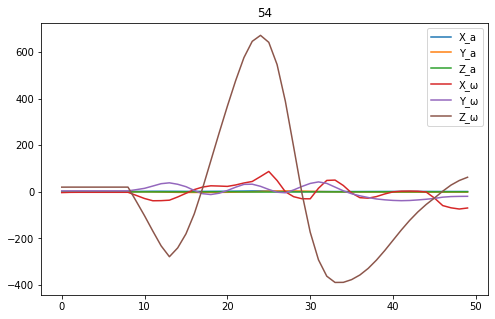

<Figure size 432x288 with 0 Axes>

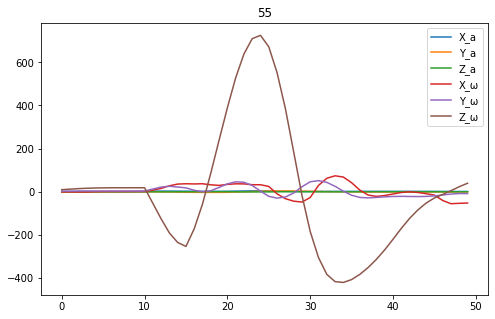

<Figure size 432x288 with 0 Axes>

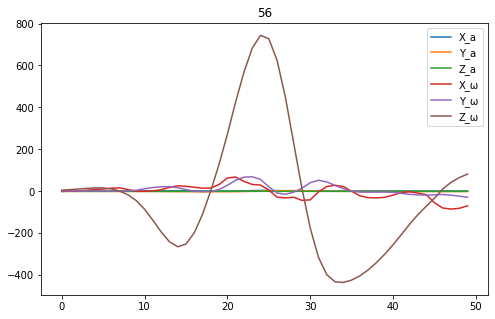

<Figure size 432x288 with 0 Axes>

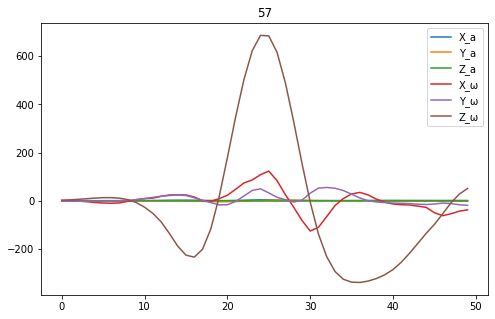

<Figure size 432x288 with 0 Axes>

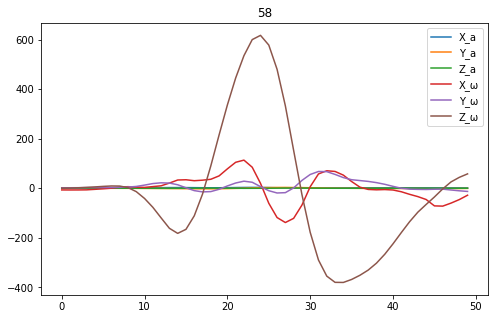

<Figure size 432x288 with 0 Axes>

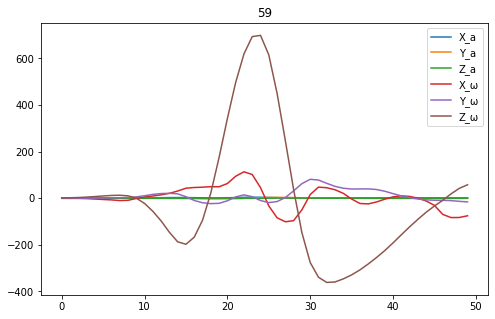

<Figure size 432x288 with 0 Axes>

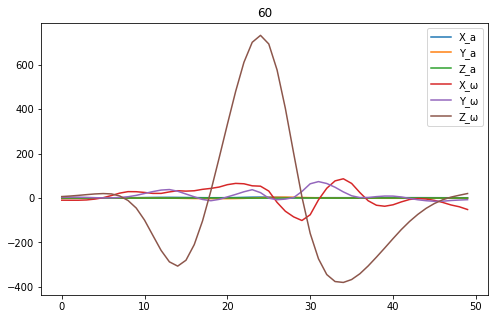

<Figure size 432x288 with 0 Axes>

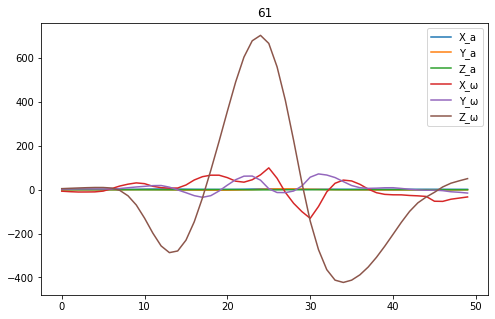

<Figure size 432x288 with 0 Axes>

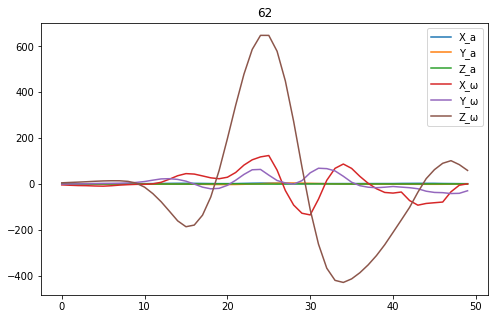

<Figure size 432x288 with 0 Axes>

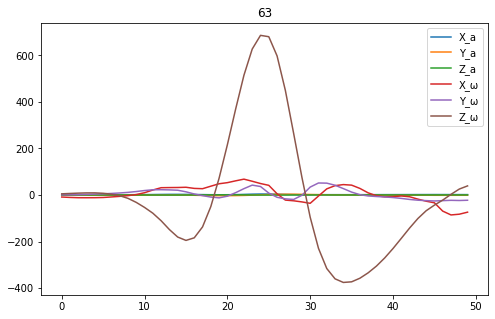

<Figure size 432x288 with 0 Axes>

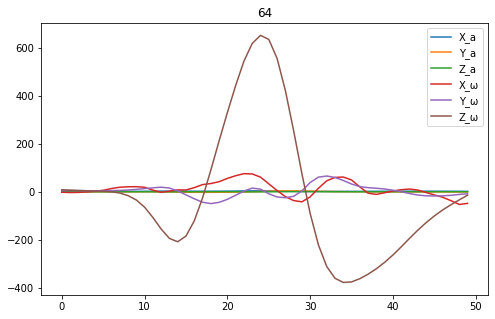

<Figure size 432x288 with 0 Axes>

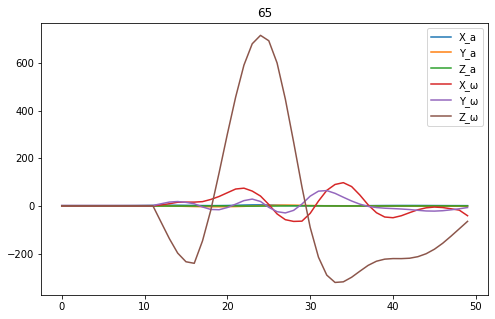

<Figure size 432x288 with 0 Axes>

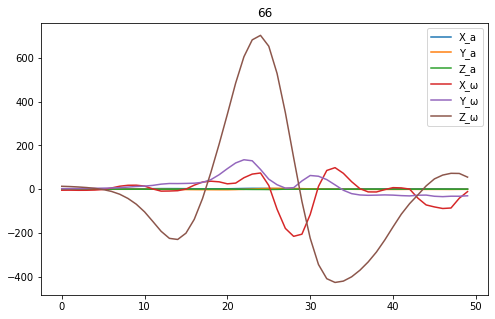

<Figure size 432x288 with 0 Axes>

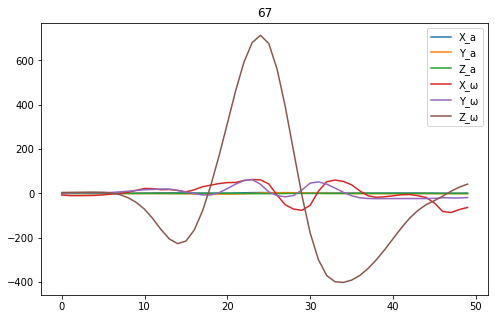

<Figure size 432x288 with 0 Axes>

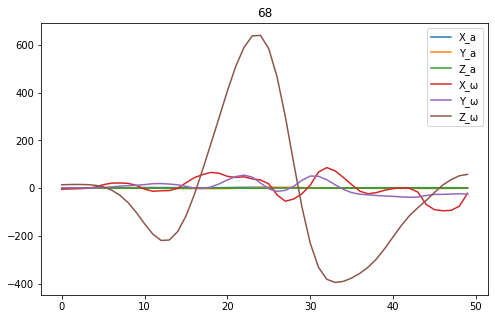

<Figure size 432x288 with 0 Axes>

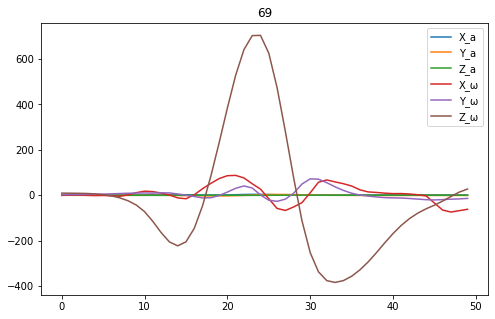

<Figure size 432x288 with 0 Axes>

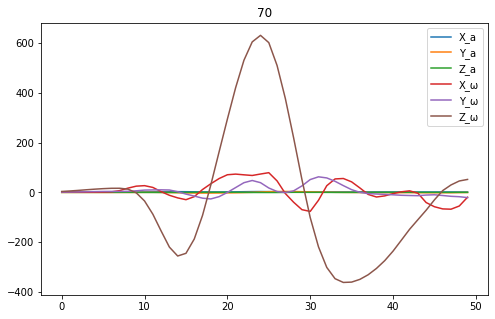

<Figure size 432x288 with 0 Axes>

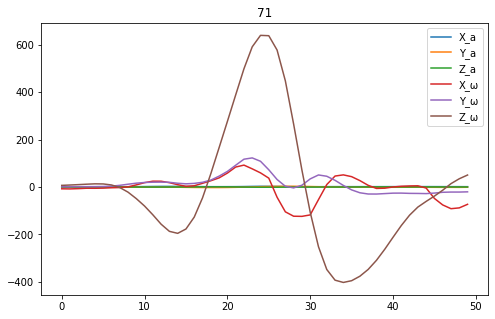

<Figure size 432x288 with 0 Axes>

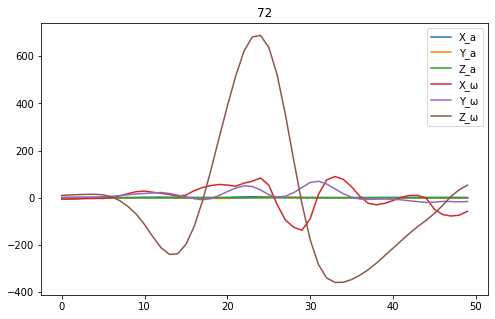

<Figure size 432x288 with 0 Axes>

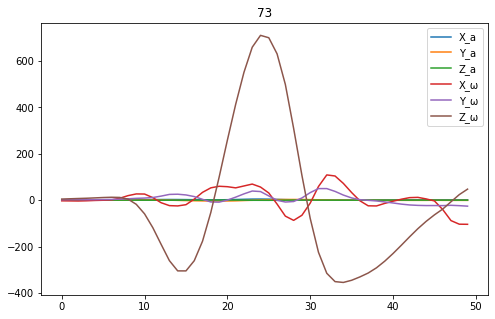

<Figure size 432x288 with 0 Axes>

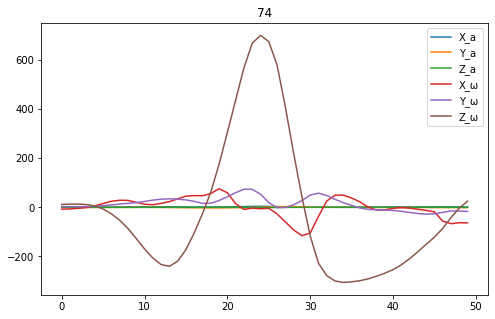

<Figure size 432x288 with 0 Axes>

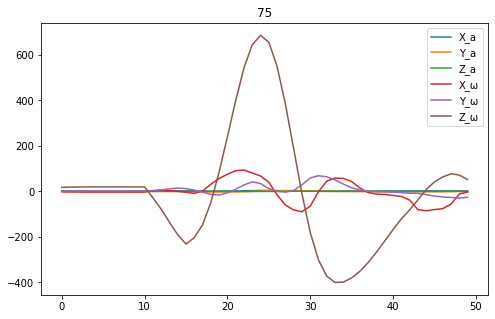

<Figure size 432x288 with 0 Axes>

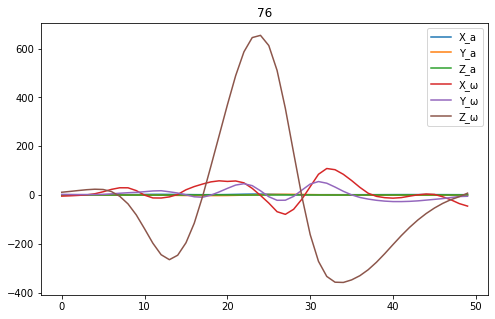

<Figure size 432x288 with 0 Axes>

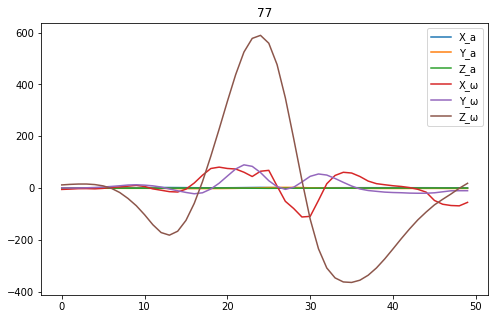

<Figure size 432x288 with 0 Axes>

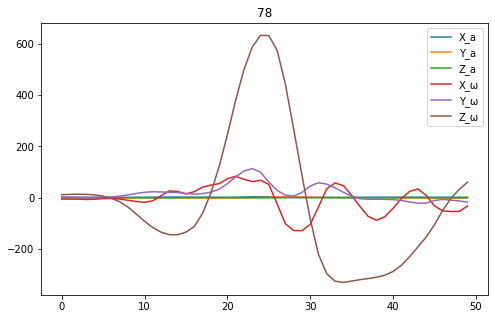

<Figure size 432x288 with 0 Axes>

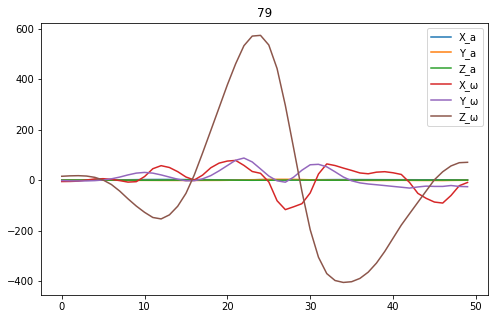

<Figure size 432x288 with 0 Axes>

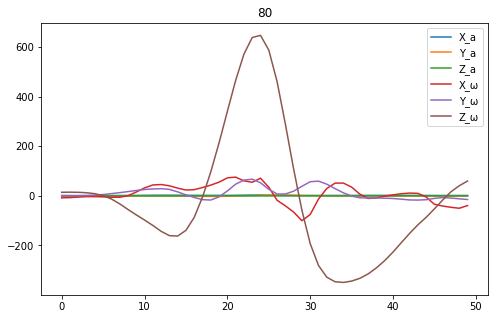

<Figure size 432x288 with 0 Axes>

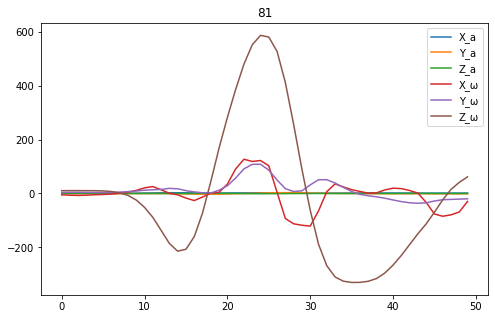

<Figure size 432x288 with 0 Axes>

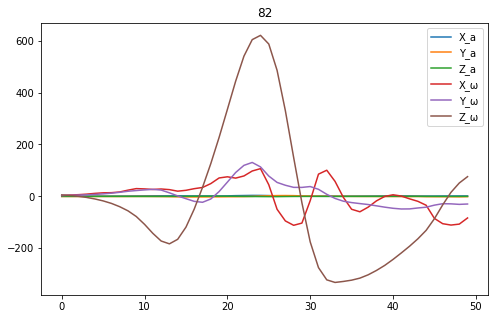

<Figure size 432x288 with 0 Axes>

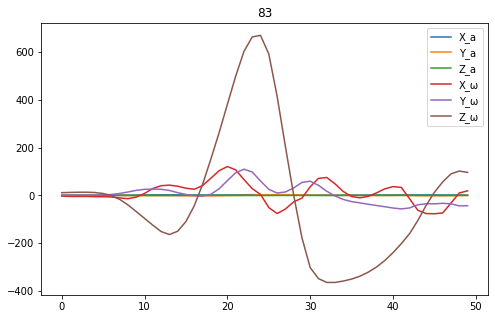

<Figure size 432x288 with 0 Axes>

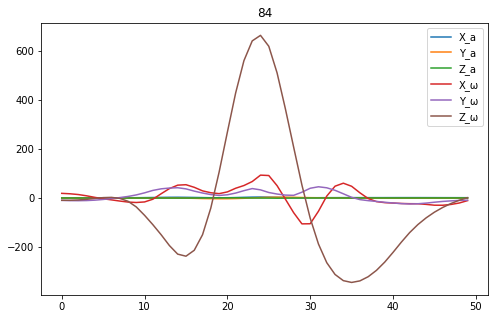

<Figure size 432x288 with 0 Axes>

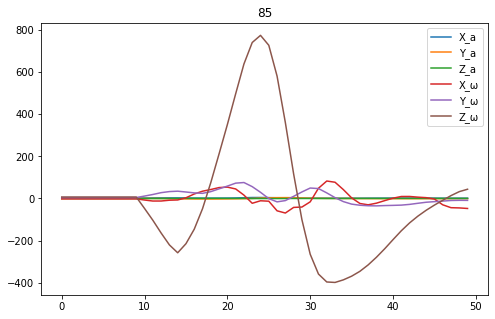

<Figure size 432x288 with 0 Axes>

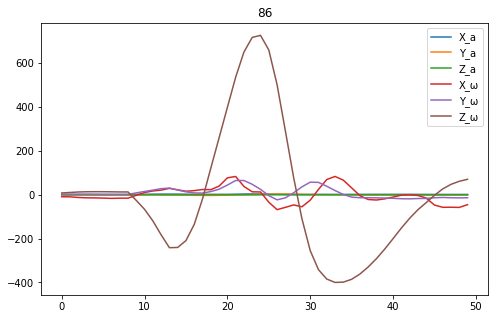

<Figure size 432x288 with 0 Axes>

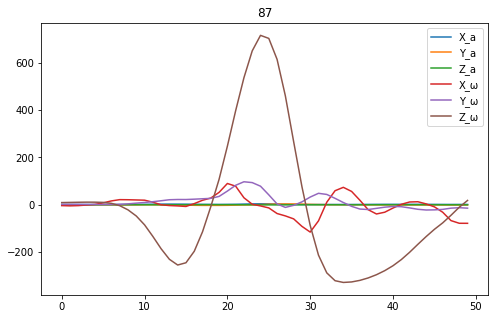

<Figure size 432x288 with 0 Axes>

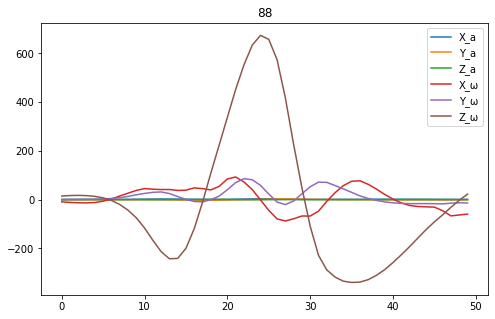

<Figure size 432x288 with 0 Axes>

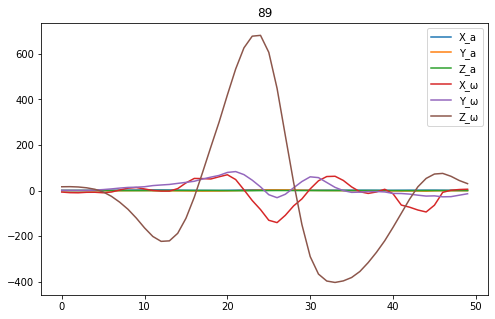

<Figure size 432x288 with 0 Axes>

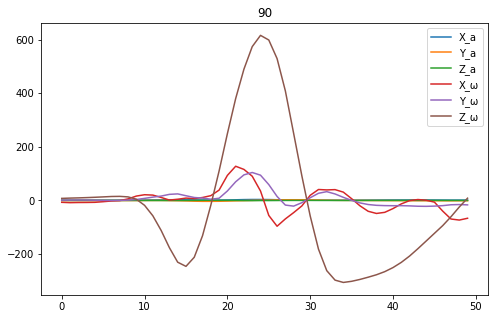

<Figure size 432x288 with 0 Axes>

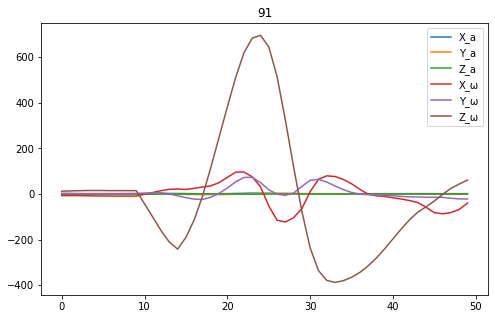

<Figure size 432x288 with 0 Axes>

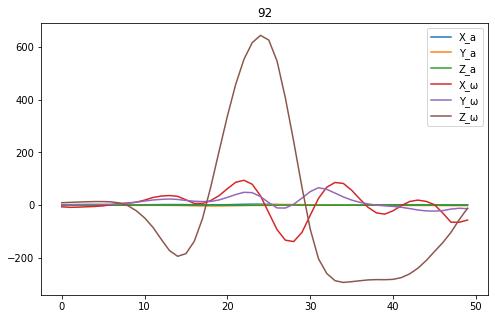

<Figure size 432x288 with 0 Axes>

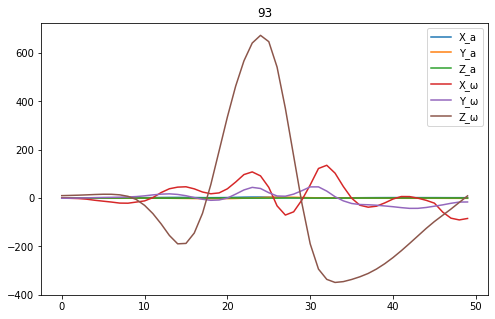

<Figure size 432x288 with 0 Axes>

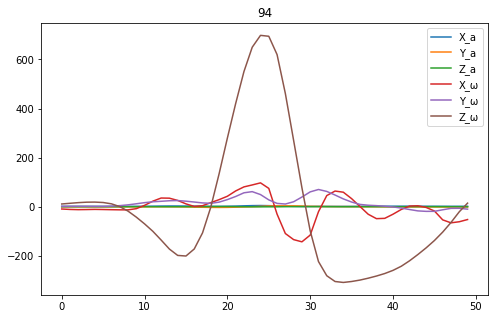

<Figure size 432x288 with 0 Axes>

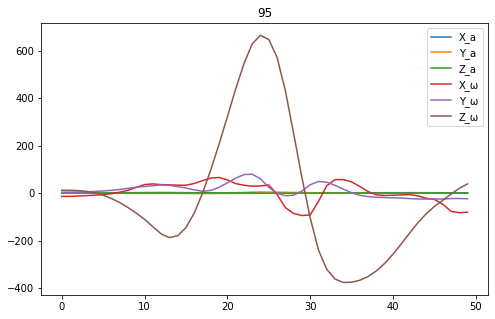

<Figure size 432x288 with 0 Axes>

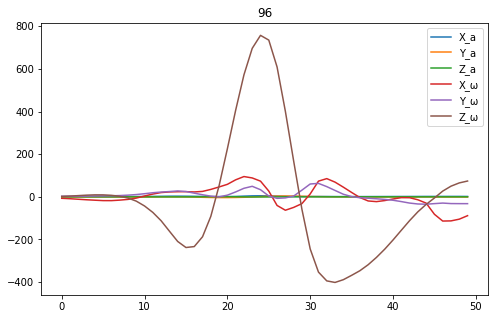

<Figure size 432x288 with 0 Axes>

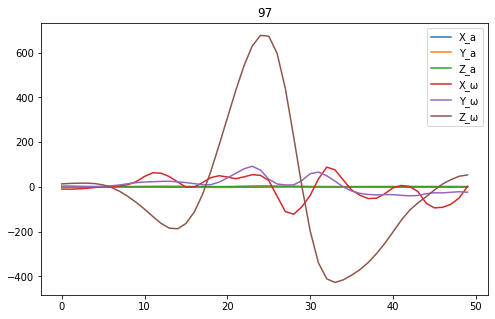

<Figure size 432x288 with 0 Axes>

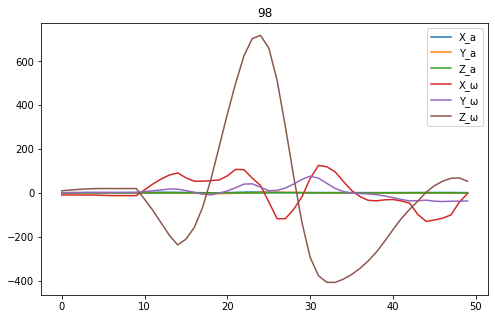

<Figure size 432x288 with 0 Axes>

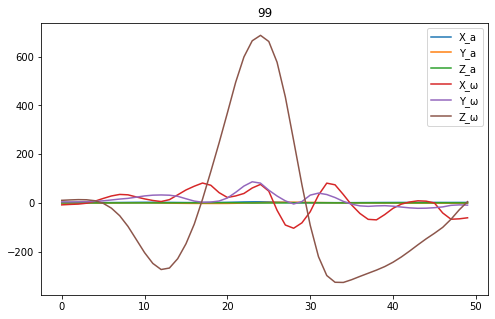

<Figure size 432x288 with 0 Axes>

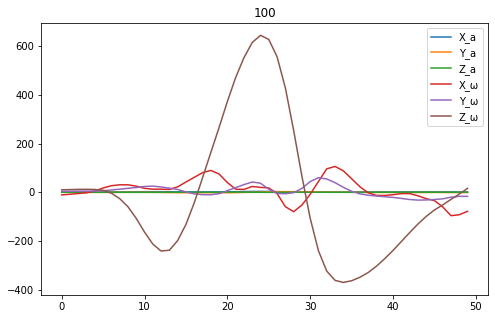

<Figure size 432x288 with 0 Axes>

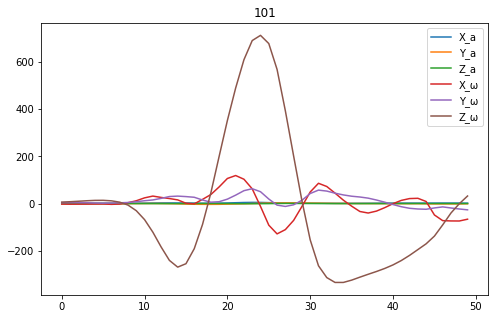

<Figure size 432x288 with 0 Axes>

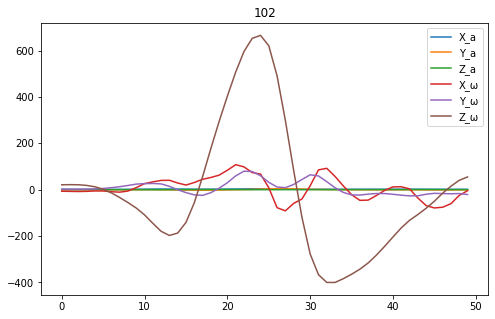

<Figure size 432x288 with 0 Axes>

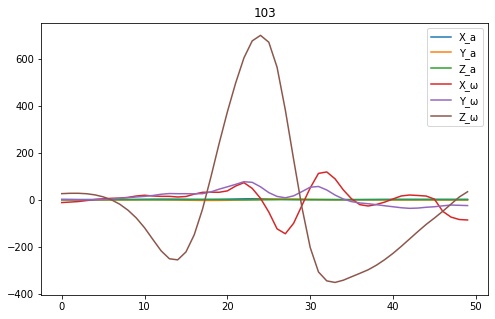

<Figure size 432x288 with 0 Axes>

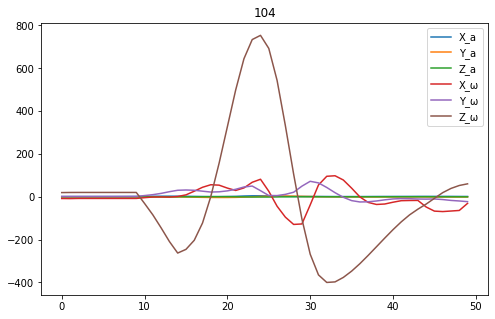

<Figure size 432x288 with 0 Axes>

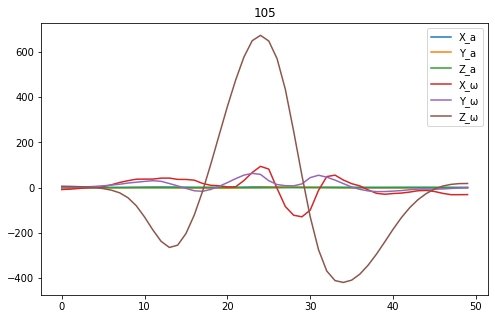

<Figure size 432x288 with 0 Axes>

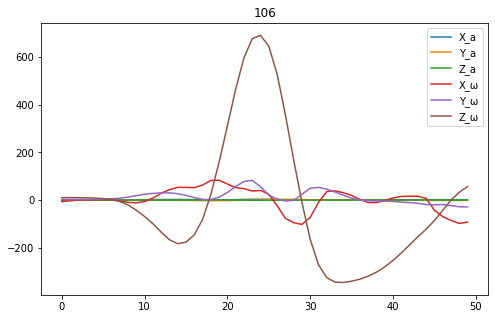

<Figure size 432x288 with 0 Axes>

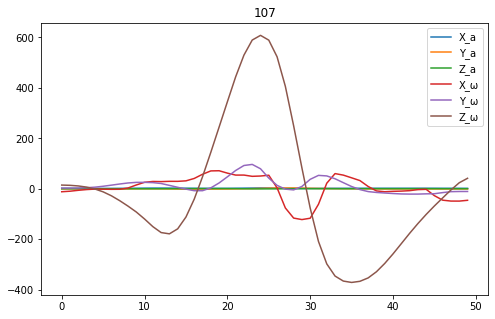

<Figure size 432x288 with 0 Axes>

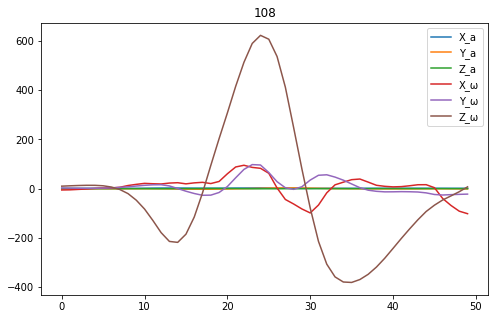

<Figure size 432x288 with 0 Axes>

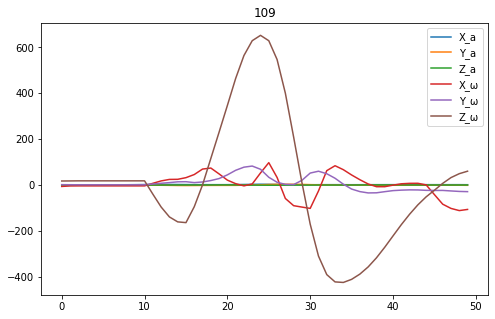

<Figure size 432x288 with 0 Axes>

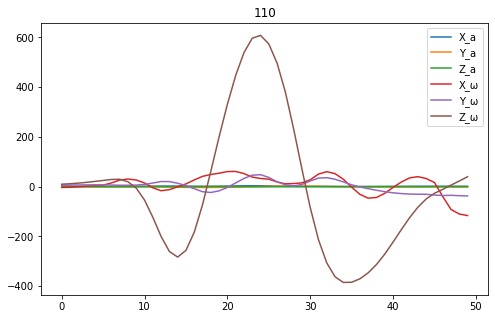

<Figure size 432x288 with 0 Axes>

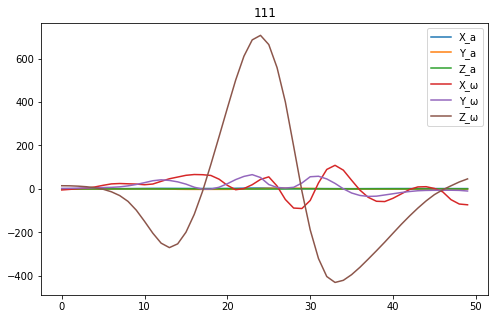

<Figure size 432x288 with 0 Axes>

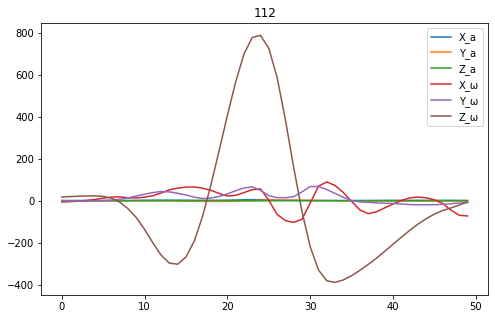

<Figure size 432x288 with 0 Axes>

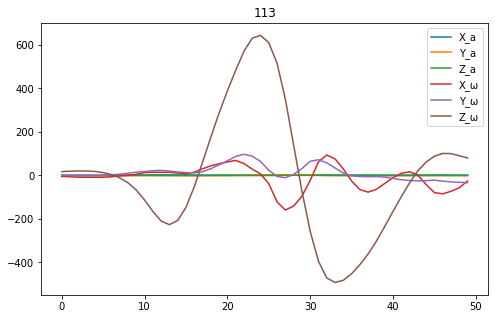

<Figure size 432x288 with 0 Axes>

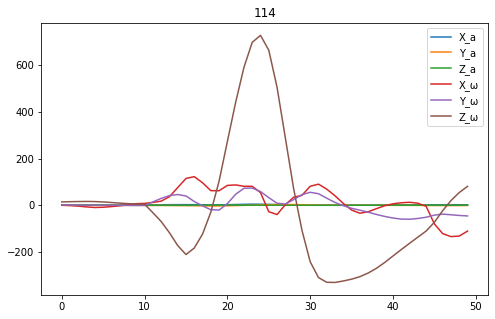

<Figure size 432x288 with 0 Axes>

In [6]:
for i in range(len(df)):
    df[i].plot(figsize=(8,5),title=i)
    plt.show()
    plt.clf()

In [7]:
df_save = pd.DataFrame()
for i in range(0,len(df)):
    df_save = df_save.append(df[i])

In [8]:
df_save

,X_a,Y_a,Z_a,X_ω,Y_ω,Z_ω
0,1.007227,-0.286719,-0.032227,-3.780488,3.646342,0.817073
1,1.007031,-0.281543,-0.022656,-3.865854,3.646342,1.341463
2,1.011523,-0.287988,-0.033887,-5.109756,3.804878,1.890244
3,1.011621,-0.294141,-0.042090,-6.219512,4.182927,2.378049
4,1.026367,-0.280469,-0.041309,-5.256098,4.695122,2.975610
...,...,...,...,...,...,...
45,1.924512,-1.073828,0.016992,-80.073171,-42.268293,-72.560975
46,2.098242,-1.271484,0.020020,-121.585367,-37.951220,-23.060975
47,2.182227,-1.439648,0.060547,-134.170733,-40.780489,20.134149
48,2.238477,-1.432617,0.077637,-131.878050,-43.756098,54.475613


In [9]:
df_save.to_excel('xhd_fq_4_9_cut.xlsx')